# Trial-Averaged Firing Rates, Spike-Train Statistics, and Spike-Triggered Average

In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Trial-Averaged Firing Rates

In [8]:
spike_times = np.loadtxt('SpikeTimes.dat')  # in ms; dimensions: spike index, trial
spike_times.shape, spike_times[:, 0]  # this is the first trial

((100, 100),
 array([  107.8,   198.6,   199.6,   213.4,   421.6,   446.2,   494.4,
          514. ,   575.8,   902.6,  1243. ,  1268.8,  1269.4,  1299.4,
         1393. ,  1404.8,  1665.2,  1740.6,  1748.8,  2041.4,  2059.2,
         2115. ,  2120.6,  2133.2,  2158. ,  2187.2,  2568.4,  2819.8,
         2825.4,  3255. ,  3267.2,  3315. ,  3319.6,  3333.8,  4021.6,
         4030.4,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,   

In [9]:
sliding_window_function = lambda tau, dt: 1 / dt if tau >= -dt/2 and tau < dt/2 else 0

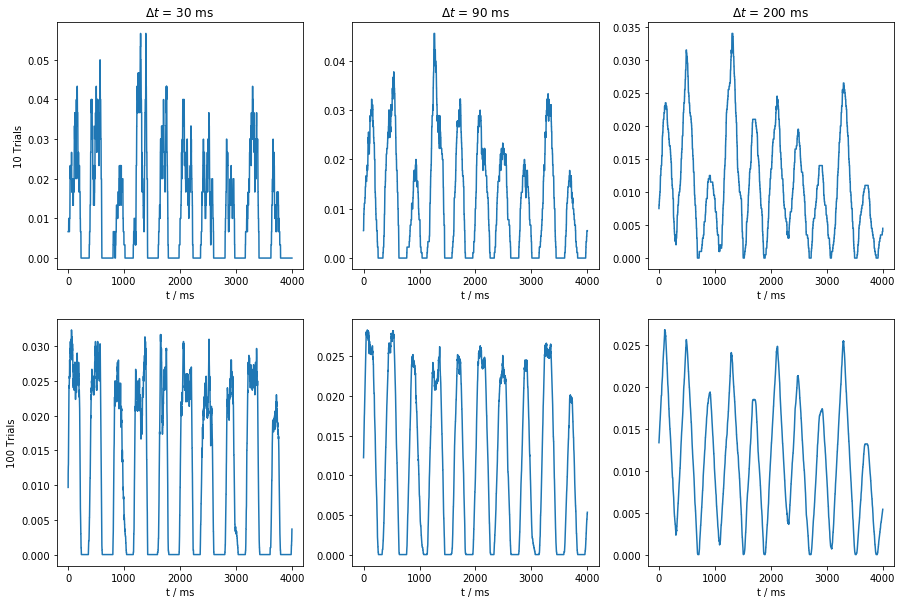

In [28]:
dts = [30, 90, 200]
num_trialss = [10, 100]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (horizontal_axes, num_trials) in enumerate(zip(axes, num_trialss)):
    for j, (ax, dt) in enumerate(zip(horizontal_axes, dts)):
        
        trial_averaged_response = np.zeros(4001)
        
        # Calculate response for each trial, then sum them up.
        for i_trial in range(num_trials):
            response = np.zeros(4001)  # in ms
            for t in range(len(response)):
                # Compute the response function for time t by summing over all spike times.
                for spike_time in spike_times[:, i_trial]:
                    response[t] += sliding_window_function(t - spike_time, dt)
            trial_averaged_response += response
            
        trial_averaged_response /= num_trials
                
        plt.sca(ax)
        plt.plot(trial_averaged_response)
        
        if i == 0:
            plt.title('$\Delta t$ = {} ms'.format(dt))
            
        #if i == len(horizontal_axes) - 1:
        plt.xlabel('t / ms')
            
        if j == 0:
            plt.ylabel('{} Trials'.format(num_trials))

With more trials, the response function becomes smoother. Also, with few trials (top row) the response function shows quite small peaks sometimes, while for all trials (bottom row) the peaks have more similar height.